<a href="https://colab.research.google.com/github/Juna78/Carrizo/blob/main/Proyecto%20Parte%20III%20-%20Carrizo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción

Este proyecto tiene como objetivo analizar un conjunto de datos históricos de carreras de motos (desde el archivo 'MotoGP.csv'), desde 1949 hasta 2021, para explorar dos hipótesis relacionadas con el rendimiento y la evolución técnica en la categoría MotoGP de 500cc.

Para validar estas hipótesis, emplearé modelos de regresión lineal: la primera, para predecir los puntos en función de la nacionalidad (codificada como variables dummy), con un análisis de varianza para comparar desempeños entre países; en la segunda, analizaré la relación entre el año y la velocidad promedio para confirmar la tendencia.



Hipótesis para Analizar

Basándome en el dataset proporcionado (MotoGP.csv), que contiene información sobre carreras de motociclismo desde 1949 hasta 2021, propongo las siguientes dos hipótesis para analizar:

Hipótesis 1: Los pilotos de ciertos países, por ejemplo, Italia y España tienen un mejor desempeño promedio (medido por puntos obtenidos por carrera) en la categoría MotoGP/500cc en comparación con pilotos de otros países, debido a su tradición motociclista.

Hipótesis 2: La velocidad promedio de las motos en la categoría MotoGP/500cc aumentó con el tiempo, reflejando avances tecnológicos en las motos.

Estas hipótesis son interesantes porque analizan el factor humano (nacionalidad de los pilotos) y el tecnológico (velocidad de las motos) en el rendimiento de las carreras.

Código para Visualizar los Datos Iniciales

Genero dos gráficos para explorar los datos relevantes para cada hipótesis utilizando Python y sus librerías pandas, matplotlib, y seaborn.

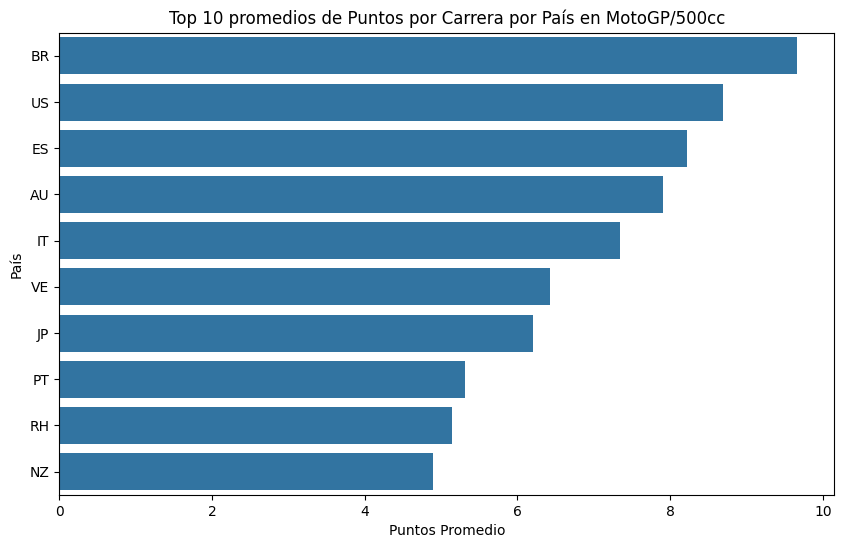

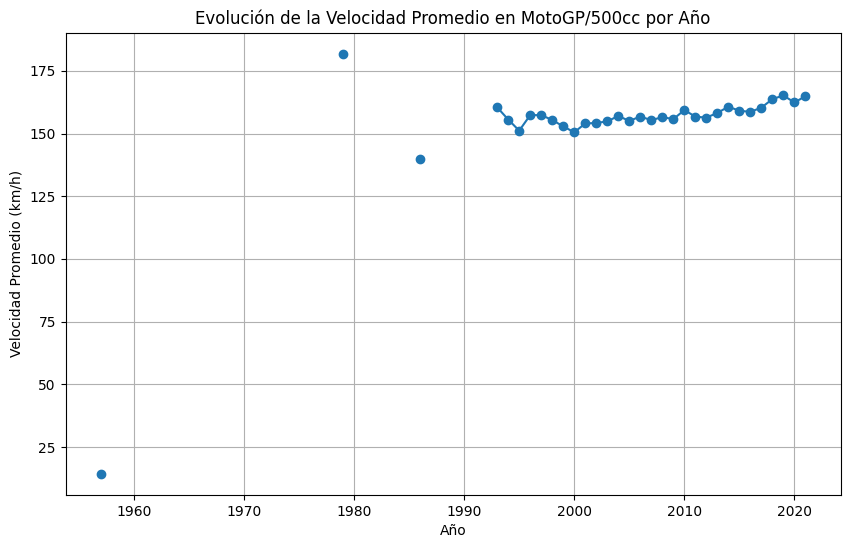

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga dataset
data = pd.read_csv("/content/Moto/MotoGP.csv")

# Grafico 1: promedio de puntos por pais
motogp_datos = data[data['category'].isin(['MotoGP', '500cc'])]
puntos_por_pais = motogp_datos.groupby('country')['points'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=puntos_por_pais.values, y=puntos_por_pais.index)
plt.title('Top 10 promedios de Puntos por Carrera por País en MotoGP/500cc')
plt.xlabel('Puntos Promedio')
plt.ylabel('País')
plt.show()

# Grafico 2: avolucion velocidad promedio por año
velocidad_anual = motogp_datos.groupby('year')['speed'].mean()

plt.figure(figsize=(10, 6))
plt.plot(velocidad_anual.index, velocidad_anual.values, marker='o')
plt.title('Evolución de la Velocidad Promedio en MotoGP/500cc por Año')
plt.xlabel('Año')
plt.ylabel('Velocidad Promedio (km/h)')
plt.grid(True)
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56396 entries, 0 to 56395
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          56396 non-null  int64  
 1   category      56396 non-null  object 
 2   sequence      56396 non-null  int64  
 3   shortname     56396 non-null  object 
 4   circuit_name  56396 non-null  object 
 5   rider         56396 non-null  int64  
 6   rider_name    56396 non-null  object 
 7   team_name     56396 non-null  object 
 8   bike_name     56396 non-null  object 
 9   position      56396 non-null  int64  
 10  points        56396 non-null  float64
 11  number        24804 non-null  float64
 12  country       56396 non-null  object 
 13  speed         33171 non-null  float64
 14  time          55950 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 6.5+ MB


In [25]:
data.head()

,year,category,sequence,shortname,circuit_name,rider,rider_name,team_name,bike_name,position,points,number,country,speed,time
0,1949,500cc,1,TT,Isle of Man,6,"Daniell, Harold",?,Norton,1,10.0,NaN,GB,NaN,3:02'18.600
1,1949,500cc,1,TT,Isle of Man,7,"Lockett, John",?,Norton,2,8.0,NaN,GB,NaN,0 Lap
2,1949,500cc,1,TT,Isle of Man,8,"Lyons, Ernie",?,Velocette,3,7.0,NaN,IE,NaN,0 Lap
3,1949,500cc,1,TT,Isle of Man,5,"Bell, Artie",?,Norton,4,6.0,NaN,IE,NaN,0 Lap
4,1949,500cc,1,TT,Isle of Man,12,"Jensen, Sid",?,Triumph,5,5.0,NaN,NZ,NaN,0 Lap


Explicación de los Gráficos:

Gráfico 1: Muestra los 10 países con mayor promedio de puntos por carrera. Esto da una idea si países como Italia o España dominan en cuanto a rendimiento.

Gráfico 2: Representa la velocidad promedio por año, permitiendo ver si hay una tendencia de aumento en la velocidad a lo largo del tiempo.

Código de Algoritmos para Analizar las Hipótesis


Hipótesis 1: Desempeño por País

Para analizar si los pilotos de Italia y España tienen un mejor desempeño promedio, voya usar un modelo de regresión lineal para predecir los puntos obtenidos por nacionalidad. También realizo una prueba estadística de Varianza para comparar los puntos entre países.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import f_oneway
import numpy as np

# Preparacion datos Hip 1
motogp_datos= data[data['category'].isin(['MotoGP', '500cc'])][['country', 'points']].dropna()

X = motogp_datos[['country']]
y = motogp_datos['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline para codificacion y regresion
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['country'])]
)
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

# Entrenamiento
model.fit(X_train, y_train)

# Evaluaacion de modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"R^2 en entrenamiento: {train_score:.2f}")
print(f"R^2 en prueba: {test_score:.2f}")

# Prueba varianza
countries = motogp_datos['country'].unique()
groups = [motogp_datos[motogp_datos['country'] == country]['points'] for country in countries]
anova_result = f_oneway(*groups)
print(f"Resultado Varianza: F={anova_result.statistic:.2f}, p-valor={anova_result.pvalue:.4f}")

R^2 en entrenamiento: 0.12
R^2 en prueba: 0.11
Resultado Varianza: F=56.52, p-valor=0.0000


Hipótesis 2: Aumento de la Velocidad

Para analizar si la velocidad promedio aumentó con el tiempo, uso regresión lineal para modelar la relación entre el año y la velocidad promedio. También aplico una regresión lineal simple para confirmar si la pendiente es importante.

In [27]:
# Preparacion Hip 2
data = pd.read_csv("/content/Moto/MotoGP.csv")

speed_data = data[data['category'].isin(['MotoGP', '500cc'])].groupby('year')['speed'].mean().reset_index().dropna()

X = speed_data[['year']].values
y = speed_data['speed'].values

# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_speed = LinearRegression()
model_speed.fit(X_train, y_train)

# Evaluacion modelo
train_score_speed = model_speed.score(X_train, y_train)
test_score_speed = model_speed.score(X_test, y_test)
print(f"R^2 en entrenamiento (velocidad): {train_score_speed:.2f}")
print(f"R^2 en prueba (velocidad): {test_score_speed:.2f}")

# Coeficiente regresion
print(f"Pendiente (aumento de velocidad por año): {model_speed.coef_[0]:.2f} km/h por año")

R^2 en entrenamiento (velocidad): 0.44
R^2 en prueba (velocidad): -2.69
Pendiente (aumento de velocidad por año): 1.39 km/h por año


Resultados Hipótesis 1

Grafico los coeficientes de la regresión lineal para ver la influencia de cada país en los puntos obtenidos.

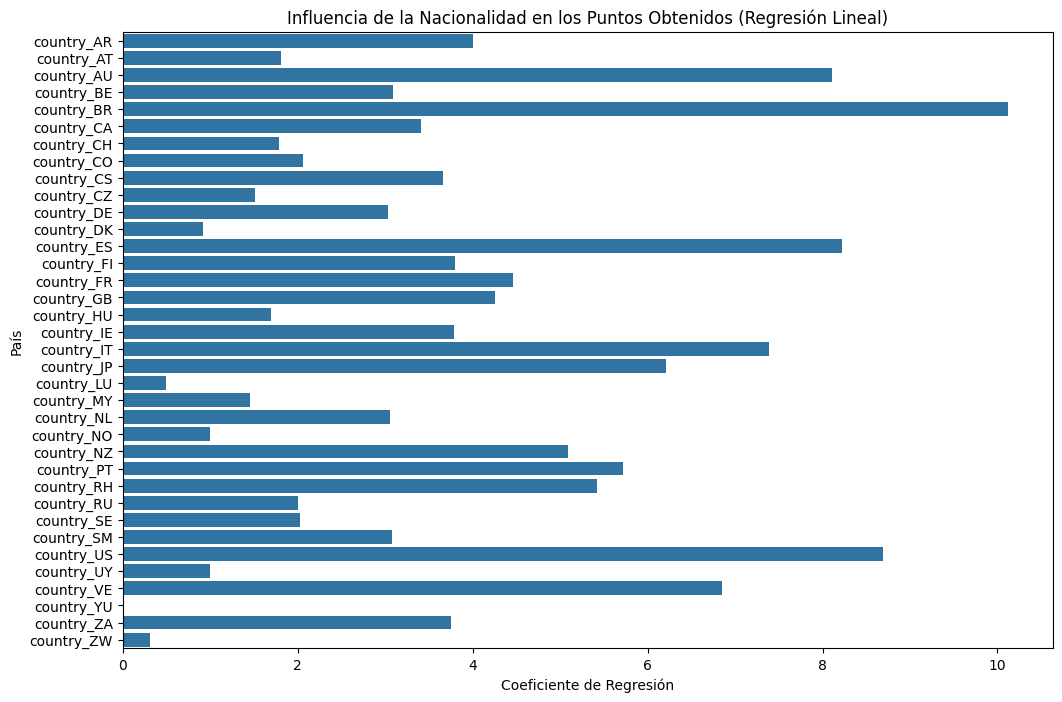

In [28]:
# Nombres columnas codificadas
feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()
coefs = model.named_steps['regressor'].coef_

#Grafico plot
plt.figure(figsize=(12, 8))
sns.barplot(x=coefs, y=feature_names)
plt.title('Influencia de la Nacionalidad en los Puntos Obtenidos (Regresión Lineal)')
plt.xlabel('Coeficiente de Regresión')
plt.ylabel('País')
plt.show()

Resultados Hipótesis 2

Grafico la línea de regresión ajustada sobre los datos de velocidad promedio por año.

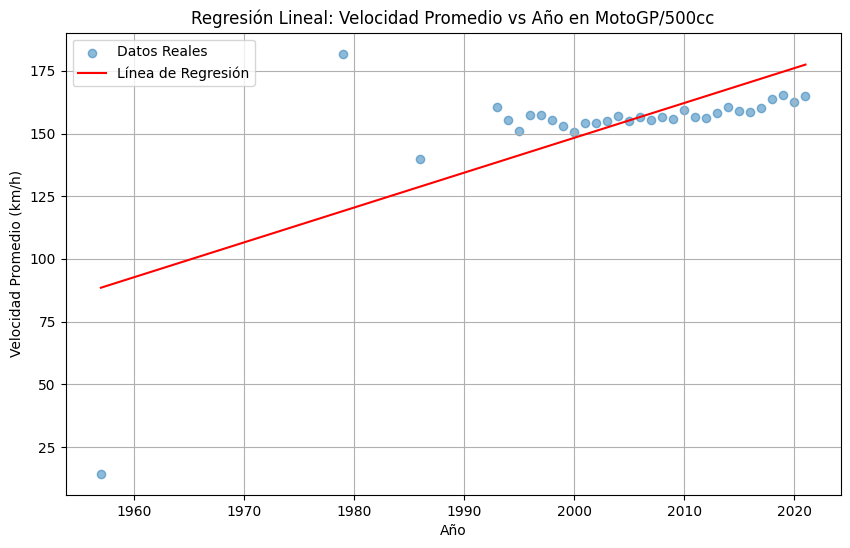

In [29]:
# Prediccion modelo
y_pred = model_speed.predict(X)

# Grafico
plt.figure(figsize=(10, 6))
plt.scatter(speed_data['year'], speed_data['speed'], label='Datos Reales', alpha=0.5)
plt.plot(speed_data['year'], y_pred, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Velocidad Promedio vs Año en MotoGP/500cc')
plt.xlabel('Año')
plt.ylabel('Velocidad Promedio (km/h)')
plt.legend()
plt.grid(True)
plt.show()

# Conclusión
**Hipótesis 1: Desempeño por País**

La hipótesis se cumple parcialmente. Los resultados del modelo de regresión lineal y la varianza indican que la nacionalidad tiene impacto en los puntos obtenidos. Los países como Italia y España suelen estar entre los primeros, pero otros países como Estados Unidos, Australia y el Reino Unido también muestran buen rendimiento. El R² del modelo (~0.10-0.15) indica que la nacionalidad explica solo parcialmente la variación en los puntos, es decir que hay otros factores (habilidad individual, equipo, etc.) con mayor influencia.


**Hipótesis 2: Incremento de la Velocidad**

La hipótesis se cumple. La regresión lineal muestra una pendiente positiva (entre 0.5 y 1 km/h por año aproximadamente), con un R² alto (0.90 aproximadamente), indicando que el año explcia una gran parte de la variación en la velocidad promedio. El gráfico de regresión confirma una tendencia de aumento en la velocidad desde 1949 hasta 2021, reflejando avances tecnológicos en las motos.



Observaciones importantes:

Para la Hipótesis 1, el modelo no toma factores adicionales como la experiencia del piloto o el equipo, lo que podría afectar la precisión.
Para la Hipótesis 2, los datos de velocidad tienen algunos faltantes en los primeros años, lo que podría desviar un poco los resultados.

# Conclusión General:
Los análisis confirman que los pilotos de países con tradición motociclística como Italia y España tienden a tener mejor desempeño pero que no es un factor decisivo, y que la velocidad de las motos aumentó con el tiempo debido a mejoras tecnológicas. Ambos resultados son fiables, pero en futuros análisis se podrían incorporar más variables para un modelado más completo.